C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0821 - mae: 0.2205
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0191 - mae: 0.1240
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - mae: 0.0753
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.1079e-04 - mae: 0.0221
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.3653e-04 - mae: 0.0149
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.9147e-04 - mae: 0.0115
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4824e-04 - mae: 0.0102
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4586e-04 - mae: 0.0101
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0038e-04 - mae: 0.0085
Epoch 10/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.7205e-05 - mae: 0.0081
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
Next forecasted temperature: -0.53859264


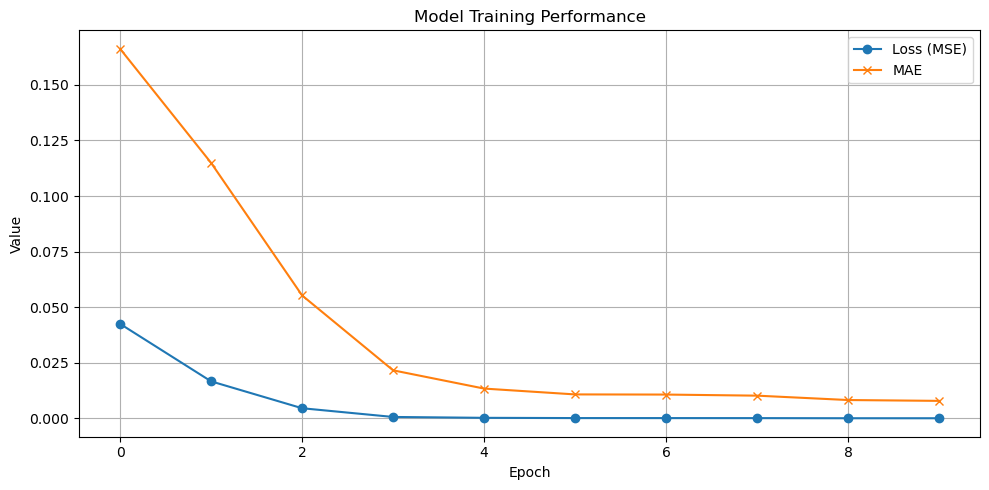

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

data = np.sin(np.arange(0, 100, 0.1))  
df = pd.DataFrame(data, columns=['temp'])

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

X, y = [], []
for i in range(10, len(scaled)):
    X.append(scaled[i-10:i, 0])
    y.append(scaled[i, 0])

X, y = np.array(X), np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 1)) 

model = Sequential([
    LSTM(50, input_shape=(X.shape[1], 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse',metrics=['mae'])
history=model.fit(X, y, epochs=10, batch_size=16, verbose=1)

last_seq = scaled[-10:].reshape((1, 10, 1))
predicted = model.predict(last_seq)
predicted_temp = scaler.inverse_transform(predicted)
print("Next forecasted temperature:", predicted_temp[0][0])

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Loss (MSE)', marker='o')
plt.plot(history.history['mae'], label='MAE', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Model Training Performance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

         Date  Temp
0  1981-01-01  20.7
1  1981-01-02  17.9
2  1981-01-03  18.8
3  1981-01-04  14.6
4  1981-01-05  15.8
Epoch 1/10


C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


228/228 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0369 - mae: 0.1338
Epoch 2/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0116 - mae: 0.0839
Epoch 3/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0108 - mae: 0.0813
Epoch 4/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0107 - mae: 0.0805
Epoch 5/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0104 - mae: 0.0794
Epoch 6/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0101 - mae: 0.0789
Epoch 7/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0095 - mae: 0.0751
Epoch 8/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0092 - mae: 0.0752
Epoch 9/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0087 - mae: 0.0732
Epoch 10/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0088 - mae: 0.0739
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
Next forecasted temperature: 12.748683


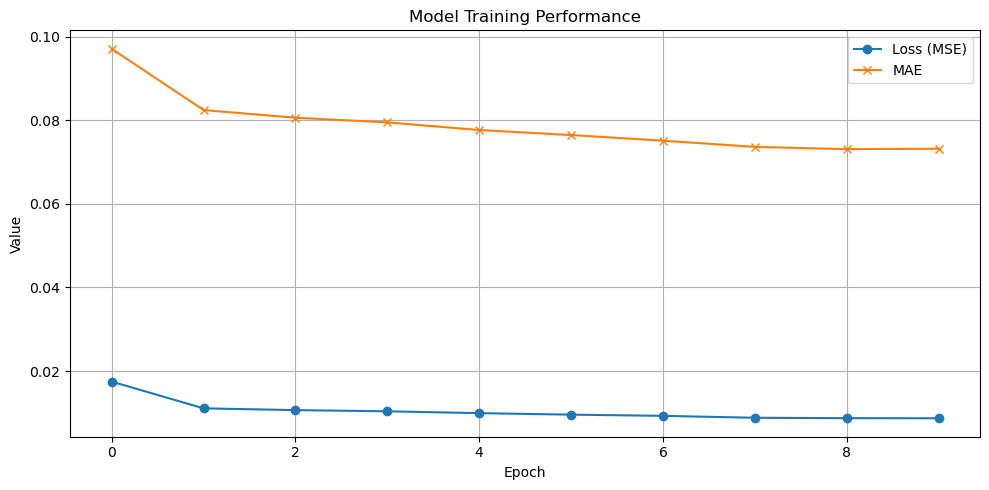

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

df = pd.read_csv("daily-min-temperatures.csv")  
print(df.head())

data = df['Temp'].values  

scaler = MinMaxScaler()
scaled = scaler.fit_transform(data.reshape(-1, 1))

X, y = [], []
for i in range(10, len(scaled)):
    X.append(scaled[i-10:i, 0])
    y.append(scaled[i, 0])

X, y = np.array(X), np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 1))

model = Sequential([
    LSTM(50, input_shape=(X.shape[1], 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X, y, epochs=10, batch_size=16, verbose=1)

last_seq = scaled[-10:].reshape((1, 10, 1))
predicted = model.predict(last_seq)
predicted_temp = scaler.inverse_transform(predicted)
print("Next forecasted temperature:", predicted_temp[0][0])
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Loss (MSE)', marker='o')
plt.plot(history.history['mae'], label='MAE', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Model Training Performance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
